In [2]:
## 자동미분

import torch


In [37]:
#Requires_grad (## x -> y -> z)

x=torch.ones(3, requires_grad=True)
print(x)
print(x.requires_grad)    # False는 자동미분을 할 준비가 안되있다. 라는 뜻

tensor([1., 1., 1.], requires_grad=True)
True


In [38]:
y=2*x
print(y)
print(y.grad)
print(y.grad_fn)    #grad_fn: 어떤 연산이 되었는지 추적
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12644\2266282404.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [39]:
z=y**2

print(z)
print(z.grad)
print(z.grad_fn)
print(z.requires_grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
None
True


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12644\3370967056.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(z.grad)


In [40]:
# backward(역전파) (## z -> y -> x)

result=z.sum()
result.backward()


In [ ]:
print(z)
print(x.grad)    # 역전파 결과
print(z.grad)


tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])
None


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12644\2207702971.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(z.grad)    # 역전파 결과


In [ ]:
## no_grad(): 역전파(자동미분)를 중지

x=torch.tensor(1.0, requires_grad=True)
y=x**2

print(x.requires_grad)
print(y.requires_grad)    # 역전파 할 준비 됨

with torch.no_grad():
    x=torch.tensor(1.0, requires_grad=True)
    y=x**2

    print(x.requires_grad)
    print(y.requires_grad)

True
True
True
False


In [50]:
## detach()

y.detach()

tensor(1.)

Epoch: 100/1000, Loss:  3.1497
Epoch: 200/1000, Loss:  3.0606
Epoch: 300/1000, Loss:  3.0277
Epoch: 400/1000, Loss:  3.0155
Epoch: 500/1000, Loss:  3.0110
Epoch: 600/1000, Loss:  3.0093
Epoch: 700/1000, Loss:  3.0087
Epoch: 800/1000, Loss:  3.0085
Epoch: 900/1000, Loss:  3.0084
Epoch: 1000/1000, Loss:  3.0084


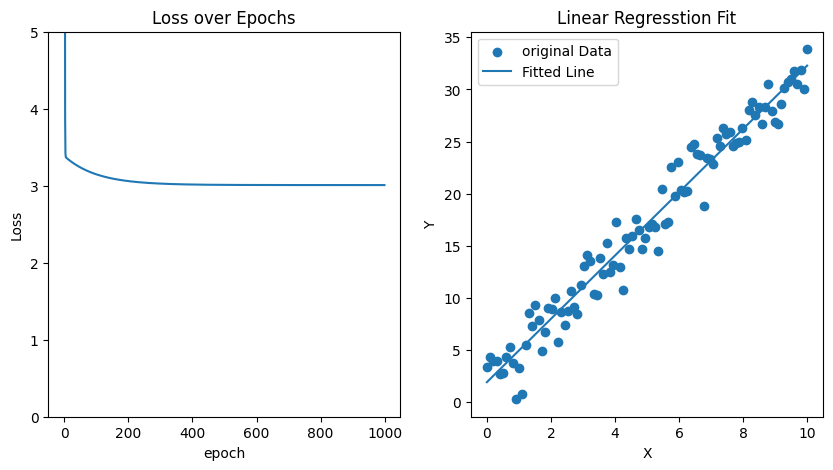

model parameter
linear.weight Parameter containing:
tensor([[3.0351]], requires_grad=True)
linear.bias Parameter containing:
tensor([1.9318], requires_grad=True)


In [ ]:
## 실습: 선형 회귀 실습

# 1. 데이터 입출력 정의
x=torch.linspace(0, 10, 100).view(-1, 1)    #0~10사이의 값 100개 생성후 데이터 형태 성형
y=3*x+2+torch.randn(100,1)*2    # 랜덤한 값 생성


# 2. 모델 정의 (x와 y 사이의 관계를 맞추는 모델 생성)
import torch.nn as nn
class LinearRegressionModel(nn.Module):    # 패키지에서 상속 받아오기
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear=nn.Linear(1,1)
    
    def forward(self, x):
        return self.linear(x)
model=LinearRegressionModel()


# 3. 손실함수 정의(MSE)
loss_function=nn.MSELoss()


# 4. 가중치 업데이트(경사 하강법)
import torch.optim as optim
optimizer=optim.SGD(model.parameters(), lr=0.01)    # Lr: Learning rate


# 5. 학습 반복
epochs=1000
losses=[]

for epoch in range(epochs):
    optimizer.zero_grad()                   # 반복마다 기울기 초기화
    outputs=model(x)                        # 결과값
    loss=loss_function(outputs, y)          # 손실 계산
    loss.backward()                         # 역전파
    optimizer.step()                        # 가중치 업데이트
    losses.append(loss.item())              # 손실값 저장

    if (epoch+1)%100==0:
        print(f'Epoch: {epoch+1}/{epochs}, Loss: {loss.item(): .4f}')


# 6. 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))


# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 5)
plt.title('Loss over Epochs')
plt.xlabel('epoch')
plt.ylabel('Loss')



# 데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label='original Data')
plt.plot(x.numpy(), model(x).detach().numpy(), label='Fitted Line')
plt.title('Linear Regresstion Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



# 최종 모델 파라미터 확인
print('model parameter')
for name, param in model.named_parameters():
    print(name, param)